# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as camera of a self driving car in front.

## Get the data

The images we're working with are form the Food101 dataset (101 different classes of food)

However we've modified it to use only two classes (pizza & steak)

**Note**: We start with smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import os

2025-04-22 10:29:17.483294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-22 10:29:17.483334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 10:29:17.534848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 10:29:17.607110: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-22 10:29:19.284435: W tensorflow/compiler/tf2

In [2]:
for dirpath, dirnames, filenames in os.walk(os.getcwd() + "/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in directory {dirpath}")

There are 2 directories and 0 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak
There are 2 directories and 0 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak/test
There are 0 directories and 250 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak/test/pizza
There are 0 directories and 250 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak/test/steak
There are 2 directories and 0 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak/train
There are 0 directories and 750 images in directory /media/armunna/New Volume/WebDevelopment/learn/artificial-intelligence/pizza-vs-steak/pizza_steak/train/pizza
There are 0 directories and 750 images in directory /media/ar

In [3]:
# Get classes programmatically
import pathlib

data_dir = pathlib.Path(os.getcwd() + "/pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [4]:
def view_random_image(target_dir, target_class):
    path = str(pathlib.Path(os.getcwd(), target_dir, target_class))
    random_image = random.sample(os.listdir(path), 1)

    img = mpimg.imread(path + "/" + random_image[0])

    plt.imshow(img)
    plt.axis("off")
    plt.title(target_class)

    print(f"Image shape: {img.shape}")

    return img;

Image shape: (512, 512, 3)


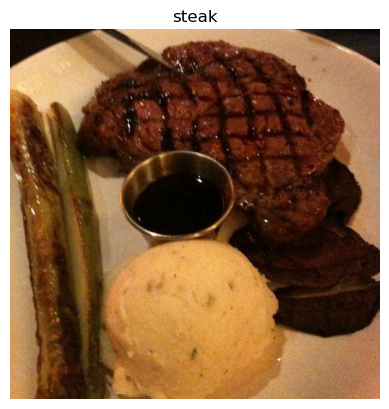

In [5]:
img = view_random_image("pizza_steak/train/", "steak")

In [6]:
import tensorflow as tf

tf.constant(img)

2025-04-22 10:29:22.284149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 10:29:22.383998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 10:29:22.384170: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 25,  15,  13],
        [ 20,  10,   8],
        [ 15,   5,   3],
        ...,
        [  8,   7,   3],
        [  7,   6,   2],
        [ 14,  13,   9]],

       [[ 21,  12,   7],
        [ 18,   9,   4],
        [ 15,   6,   1],
        ...,
        [ 13,  12,   8],
        [  7,   6,   2],
        [ 10,   9,   5]],

       [[ 18,   9,   4],
        [ 19,  10,   5],
        [ 17,   8,   3],
        ...,
        [ 16,  15,  11],
        [  8,   7,   3],
        [ 10,   9,   5]],

       ...,

       [[215, 155, 103],
        [214, 154, 102],
        [209, 149,  95],
        ...,
        [204, 133,  87],
        [207, 136,  92],
        [204, 133,  89]],

       [[203, 143,  93],
        [213, 153, 103],
        [207, 147,  95],
        ...,
        [210, 139,  93],
        [217, 146, 100],
        [205, 134,  88]],

       [[213, 152, 105],
        [207, 147,  97],
        [207, 147,  97],
        ...,
        [208, 137,  9

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN to find patterns in data
* Compile our CNN
* Fit the CNN to our training data

In [7]:
import tf_keras as keras

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224, 224, 3)),
    keras.layers.Conv2D(10, 3, activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    keras.layers.Conv2D(10, 3, activation="relu"),
    keras.layers.Conv2D(10, 3, activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2025-04-22 10:29:34.222904: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2025-04-22 10:29:36.026710: I external/local_xla/xla/service/service.cc:168] XLA service 0x74d56431e400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-22 10:29:36.026733: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-22 10:29:36.034052: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745296176.123944    5433 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 [==============================] - 27s 242ms/step - loss: 0.6663 - accuracy: 0.5873 - val_loss: 0.5420 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 7s 150ms/step - loss: 0.5010 - accuracy: 0.7680 - val_loss: 0.4182 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4273 - accuracy: 0.8153 - val_loss: 0.3464 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3565 - accuracy: 0.8493 - val_loss: 0.3360 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.2612 - accuracy: 0.8980 - val_loss: 0.3403 - val_accuracy: 0.8740


## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling / normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


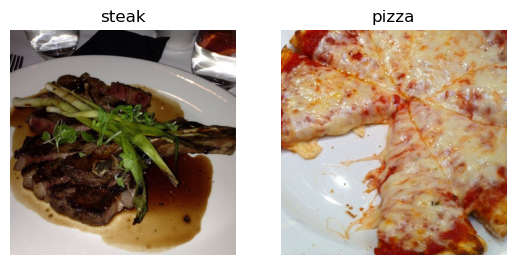

In [10]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [11]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might look at 32 at a time

It does this for a couple of reasons:
1. 10,000 images (or more) might into the memory of your processor (GPU)
2. Trying to learn 10,000 images in one hit could result in the model not being able to learn very well.

Why 32

32 is good for your health

In [12]:
!nvidia-smi

Tue Apr 22 10:30:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   64C    P0             15W /   50W |    2821MiB /   4096MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [16]:
images[:2]

array([[[[0.07843138, 0.10980393, 0.20000002],
         [0.2901961 , 0.32156864, 0.5058824 ],
         [0.36078432, 0.4039216 , 0.6627451 ],
         ...,
         [0.7803922 , 0.85098046, 0.9921569 ],
         [0.7843138 , 0.854902  , 0.9960785 ],
         [0.77647066, 0.8470589 , 0.98823535]],

        [[0.0509804 , 0.08235294, 0.16470589],
         [0.32156864, 0.3529412 , 0.53333336],
         [0.43529415, 0.47450984, 0.7176471 ],
         ...,
         [0.7686275 , 0.8470589 , 0.9843138 ],
         [0.7607844 , 0.8313726 , 0.9725491 ],
         [0.76470596, 0.83921576, 0.9686275 ]],

        [[0.04705883, 0.07450981, 0.14509805],
         [0.28235295, 0.3137255 , 0.4666667 ],
         [0.43921572, 0.47450984, 0.69803923],
         ...,
         [0.7725491 , 0.85098046, 0.98823535],
         [0.7568628 , 0.8352942 , 0.96470594],
         [0.7607844 , 0.8352942 , 0.96470594]],

        ...,

        [[0.69411767, 0.80392164, 0.98823535],
         [0.68235296, 0.80392164, 0.9843138 ]

In [17]:
labels

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

### Create a CNN model (start with baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine experimenting, you try to beat the baseline

In [18]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [19]:
# Create baseline model (3 layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [20]:
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [21]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
len(train_data), len(test_data)

(47, 16)

In [23]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 187ms/step - loss: 1.1121 - accuracy: 0.6213 - val_loss: 0.5241 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4797 - accuracy: 0.7787 - val_loss: 0.4854 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3499 - accuracy: 0.8553 - val_loss: 0.3913 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.1692 - accuracy: 0.9413 - val_loss: 0.4222 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.0634 - accuracy: 0.9873 - val_loss: 0.4854 - val_accuracy: 0.8100


### Evaluating our model

It looks like our model is learning something. let's evaluate it

<Axes: >

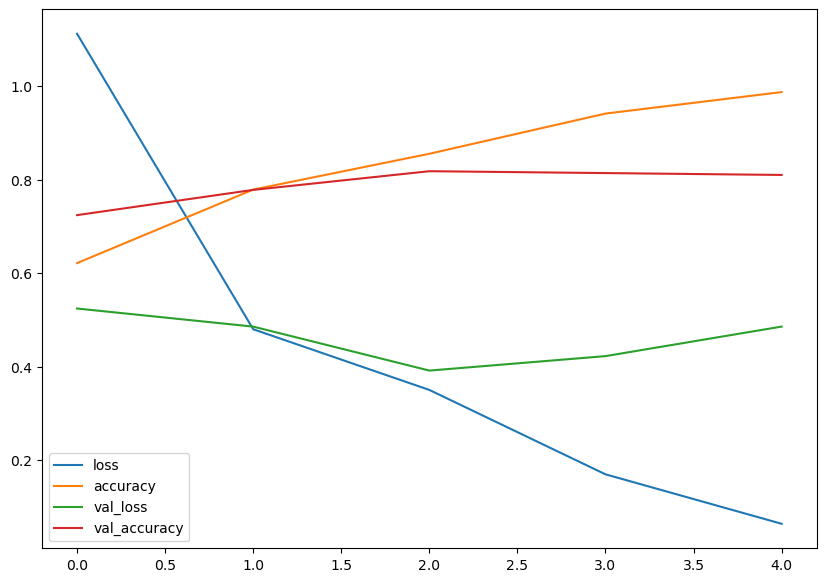

In [24]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [25]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")

    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()


    plt.figure()
    plt.plot(epochs, accuracy, label="Training accuracy")
    plt.plot(epochs, val_accuracy, label="Validation accuracy")

    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

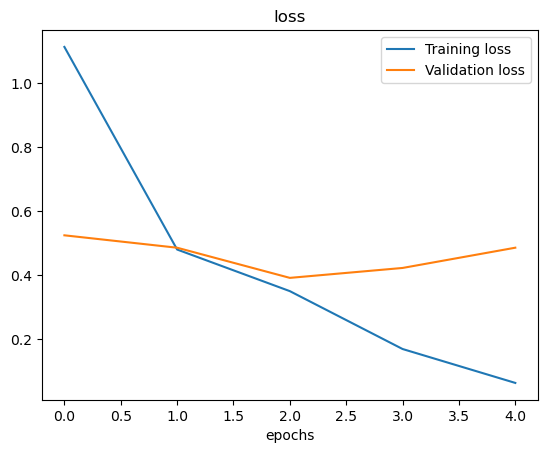

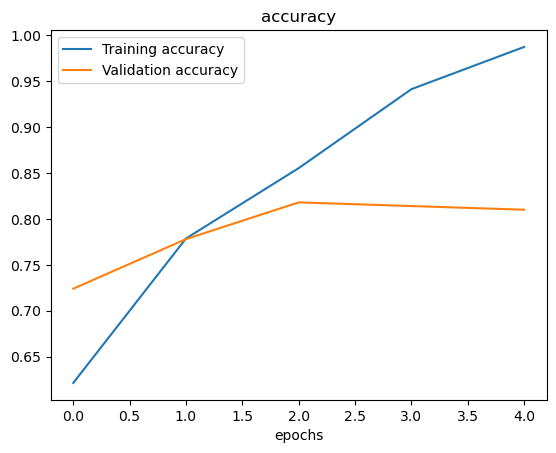

In [26]:
plot_loss_curves(history_4)

**Note**: When a model's **validation loss starts to increase**, it's likely the model is **overfitting** on the training dataset. This means it's learning the patter in the training dataset **to well** and thus the model's ability to generalize unseen data will be diminished.

In [27]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [28]:
model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [29]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 151ms/step - loss: 0.6546 - accuracy: 0.5987 - val_loss: 0.5098 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4786 - accuracy: 0.7840 - val_loss: 0.3874 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4485 - accuracy: 0.7927 - val_loss: 0.3639 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4090 - accuracy: 0.8193 - val_loss: 0.3738 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4026 - accuracy: 0.8220 - val_loss: 0.3744 - val_accuracy: 0.8260


In [30]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

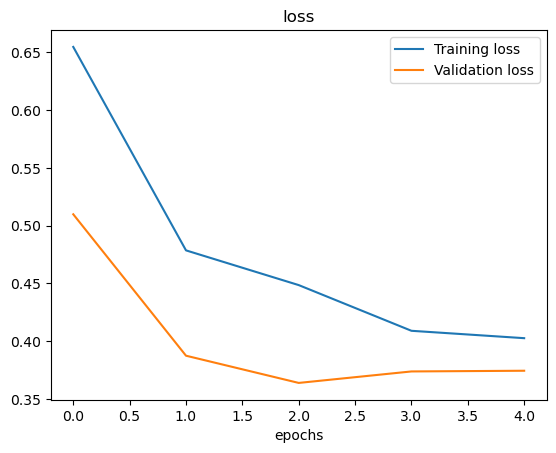

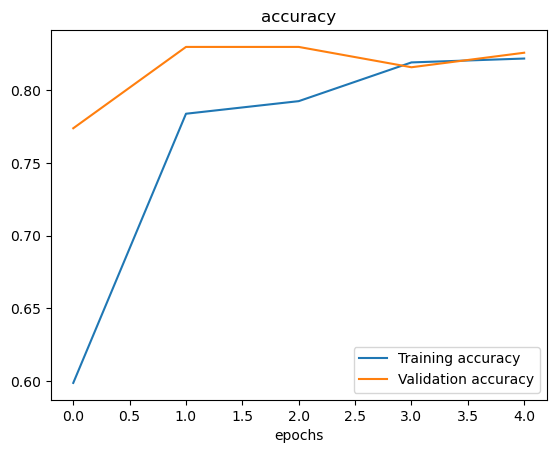

In [31]:
plot_loss_curves(history_5)

**Note**: Reducing overfitting is also know as **regularization**.

### Opening our bag of tricks and finding data augmentation

In [32]:
# ImageDataGenerator with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2,
 horizontal_flip=True)

# ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


In [33]:
# Augmented training data
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224, 224), batch_size=32, class_mode="binary", seed=42, shuffle=False)

print("Non-Augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224, 224), batch_size=32, class_mode="binary", seed=42, shuffle=False)

print("Non-Augmented test data: ")
test_data_augmented = test_datagen.flow_from_directory(test_dir,target_size=(224, 224), batch_size=32, class_mode="binary", seed=42, shuffle=False)

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-Augmented test data: 
Found 500 images belonging to 2 classes.


**Note**: Data augmentation is usually only performed in the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but modified as they're loaded into the model

In [34]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only data (images)

Showing image number: 5


(-0.5, 223.5, 223.5, -0.5)

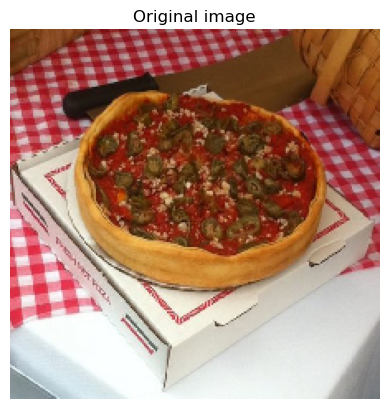

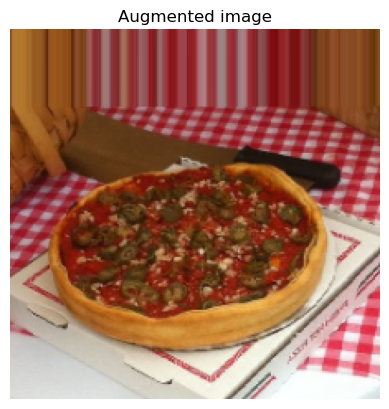

In [35]:
random_number = random.randint(0, 31)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [36]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
22/47 [=============>................] - ETA: 7s - loss: 0.9596 - accuracy: 0.4716

47/47 [==============================] - 18s 365ms/step - loss: 0.8252 - accuracy: 0.4973 - val_loss: 0.6700 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 18s 379ms/step - loss: 0.6839 - accuracy: 0.5687 - val_loss: 0.6509 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 18s 387ms/step - loss: 0.6793 - accuracy: 0.5833 - val_loss: 0.6287 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 18s 381ms/step - loss: 0.6699 - accuracy: 0.6000 - val_loss: 0.6500 - val_accuracy: 0.5520
Epoch 5/5
47/47 [==============================] - 18s 383ms/step - loss: 0.6705 - accuracy: 0.5960 - val_loss: 0.6076 - val_accuracy: 0.6780


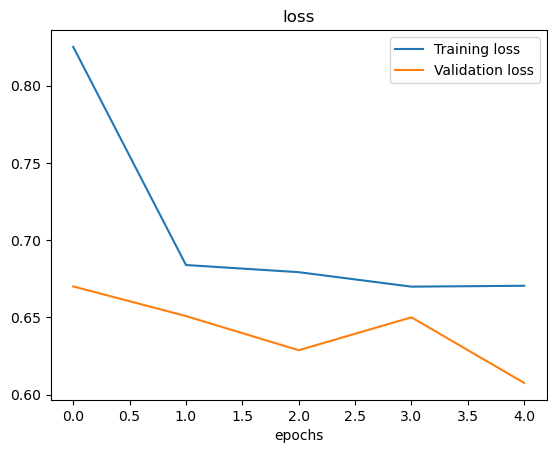

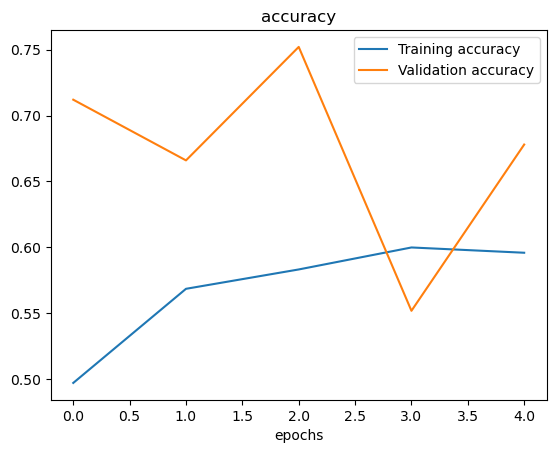

In [37]:
plot_loss_curves(history_6)

In [38]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224, 224), batch_size=32, class_mode="binary",  shuffle=True)

Found 1500 images belonging to 2 classes.


In [39]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 385ms/step - loss: 0.6519 - accuracy: 0.6260 - val_loss: 0.5679 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 19s 395ms/step - loss: 0.5768 - accuracy: 0.7040 - val_loss: 0.4235 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 19s 401ms/step - loss: 0.5193 - accuracy: 0.7447 - val_loss: 0.3961 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 19s 397ms/step - loss: 0.4678 - accuracy: 0.7787 - val_loss: 0.3461 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 20s 417ms/step - loss: 0.4701 - accuracy: 0.7860 - val_loss: 0.4269 - val_accuracy: 0.8060


### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice**: Recreate the model on the cnn explainer website. same as model_1 and see how it performs on the augmented shuffled training data

### Making a prediction with our trained model on our own custom data

In [40]:
pizza_01 = mpimg.imread("custom_images/pizza_01.jpg")
pizza_02 = mpimg.imread("custom_images/pizza_02.jpg")
steak_01 = mpimg.imread("custom_images/steak_01.jpg")
steak_02 = mpimg.imread("custom_images/steak_02.jpg")

In [41]:
# Create a function to import an image and resize it to be able to used with our model

def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, and turns it into a tensor and reshapes to  (img_shape, img_shape, color_channels)
    """

    # Read in the image
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    return img

In [42]:
pizza_01 = load_and_prep_image("custom_images/pizza_01.jpg")
pizza_01

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
        [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
        [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
        ...,
        [1.9616103e-01, 3.0772495e-01, 3.3513626e-01],
        [1.9411600e-01, 2.9111192e-01, 3.0967644e-01],
        [1.4609909e-01, 2.2845203e-01, 2.4805987e-01]],

       [[4.2016720e-03, 4.2016720e-03, 4.2016720e-03],
        [2.8010350e-04, 2.8010350e-04, 2.8010350e-04],
        [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
        ...,
        [2.3757824e-01, 3.9063841e-01, 4.2801288e-01],
        [1.1340545e-01, 1.4702217e-01, 1.4254147e-01],
        [8.3994702e-02, 1.2881318e-01, 1.2993334e-01]],

       [[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
        [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
        [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
        ...,
        [1.6650745e-01, 2.1456526e-01, 2.2380841e-01],
        [1.9003357e-01

In [43]:
pred = model_7.predict(tf.expand_dims(pizza_01, axis=0))
pred

1/1 [==============================] - 0s 272ms/step


array([[0.05932363]], dtype=float32)

In [44]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model and plots the image image with the predicted class as the title.
    """
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class.title()}")

1/1 [==============================] - 0s 15ms/step


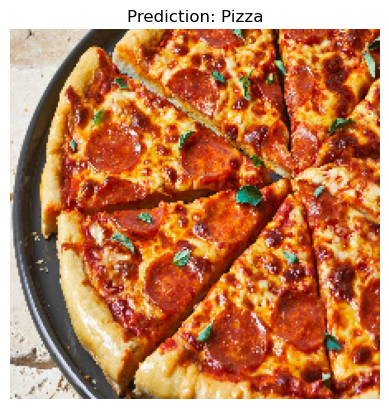

In [45]:
pred_and_plot(model_7, "custom_images/pizza_02.jpg")

# Multi-class image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [46]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in directory {dirpath}")

There are 2 directories and 0 images in directory 10_food_classes_all_data
There are 10 directories and 0 images in directory 10_food_classes_all_data/test
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in directory 10_food_classes_all_data/test/steak
There are 0 di

In [47]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [48]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


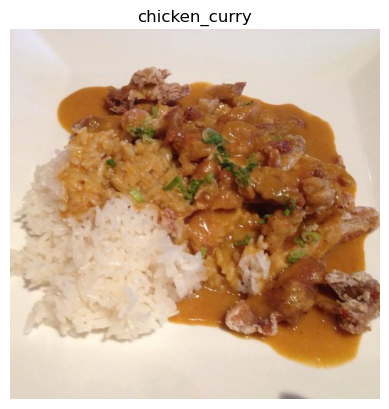

In [49]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### Preprocess the data

In [50]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.);
test_datagen = ImageDataGenerator(rescale=1/255.);


train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

test_data = train_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [51]:
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 40s 166ms/step - loss: 2.2645 - accuracy: 0.1452 - val_loss: 2.1277 - val_accuracy: 0.1992
Epoch 2/5
235/235 [==============================] - 40s 169ms/step - loss: 2.0515 - accuracy: 0.2567 - val_loss: 2.0235 - val_accuracy: 0.2744
Epoch 3/5
235/235 [==============================] - 38s 162ms/step - loss: 1.9119 - accuracy: 0.3263 - val_loss: 2.0392 - val_accuracy: 0.2724
Epoch 4/5
235/235 [==============================] - 39s 164ms/step - loss: 1.6702 - accuracy: 0.4239 - val_loss: 2.0618 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 39s 166ms/step - loss: 1.1659 - accuracy: 0.6080 - val_loss: 2.4889 - val_accuracy: 0.2740


In [52]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 123ms/step - loss: 2.4889 - accuracy: 0.2740


[2.4888951778411865, 0.27399998903274536]

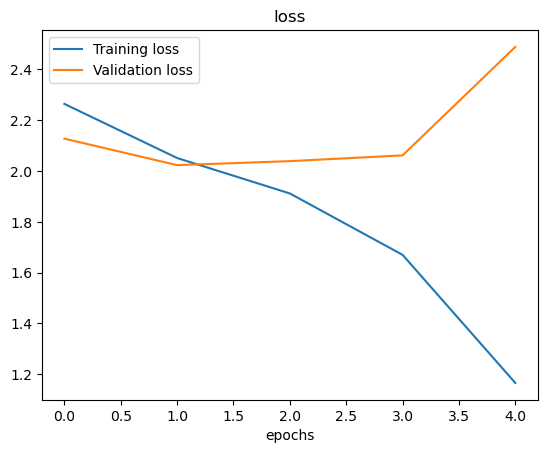

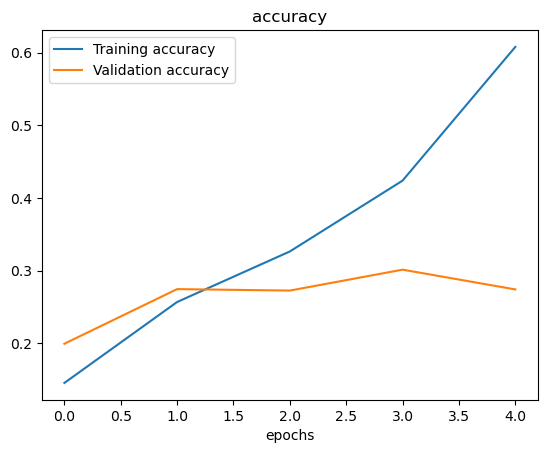

In [53]:
plot_loss_curves(history_8)

Well... it seems our model is **overfitting** the training set quite badly, in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat baseline/reduce overfitting)

Due to it's performance in training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data.

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if your current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allow you to use those patterns on your own dataset

In [54]:
model_8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [55]:
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 40s 168ms/step - loss: 2.1884 - accuracy: 0.2317 - val_loss: 1.9598 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 37s 156ms/step - loss: 1.8034 - accuracy: 0.3864 - val_loss: 1.9111 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 38s 161ms/step - loss: 1.4805 - accuracy: 0.5083 - val_loss: 2.0071 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 40s 171ms/step - loss: 1.0891 - accuracy: 0.6528 - val_loss: 2.2801 - val_accuracy: 0.3184
Epoch 5/5
235/235 [==============================] - 40s 171ms/step - loss: 0.7360 - accuracy: 0.7744 - val_loss: 2.6401 - val_accuracy: 0.2952


### Trying to reduce overfitting with data augmentation

In [56]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [57]:
model_10 = keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 102s 427ms/step - loss: 2.2514 - accuracy: 0.1569 - val_loss: 2.1124 - val_accuracy: 0.2152
Epoch 2/5
235/235 [==============================] - 93s 396ms/step - loss: 2.1239 - accuracy: 0.2272 - val_loss: 2.0934 - val_accuracy: 0.2636
Epoch 3/5
235/235 [==============================] - 89s 378ms/step - loss: 2.0382 - accuracy: 0.2723 - val_loss: 1.8885 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 92s 393ms/step - loss: 1.9784 - accuracy: 0.3065 - val_loss: 1.8564 - val_accuracy: 0.3624
Epoch 5/5
235/235 [==============================] - 97s 413ms/step - loss: 1.9379 - accuracy: 0.3267 - val_loss: 1.7400 - val_accuracy: 0.4064


In [59]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model and plots the image image with the predicted class as the title.
    """
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0)) # Its prediction probabilities in case of multi-class classification

    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class.title()}")

1/1 [==============================] - 0s 335ms/step


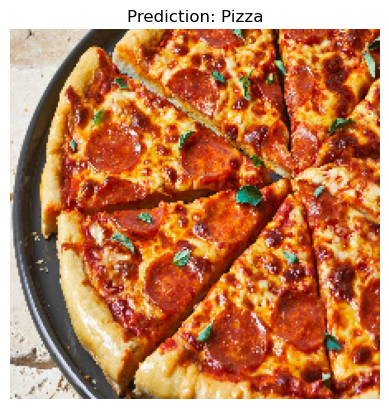

In [60]:
pred_and_plot(model_10, "custom_images/pizza_02.jpg", class_names)

In [61]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [63]:
loaded_model_10 = keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

     33/Unknown - 4s 126ms/step - loss: 1.7338 - accuracy: 0.4100

KeyboardInterrupt: 